In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import itertools as it
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from spectral import *
def diff(a, b):
    a = np.asarray(a)
    b = np.asarray(b)
    return 2*np.linalg.norm(a - b)/np.linalg.norm(a + b)

## Basic multidomain Legendre mesh functions

In [2]:
mesh = Multidomain(Legendre(10), (2, 4, 5, 8))
X, = mesh.grid()
u = TensorField(mesh, np.random.randn(*mesh.shape))
x = np.linspace(*mesh.endpoints, 3000)

In [3]:
print(diff(u.func, u().func))
print(diff(u.func, u(None).func))

0.0
0.0


In [4]:
u.func.shape

(33,)

In [5]:
mesh2 = Multidomain(Legendre(55), mesh.partition)
u2 = u.remesh(mesh2)
X2, = mesh2.grid()
diff(u2.remesh(mesh).func, u.func)

1.6339296250736273e-15

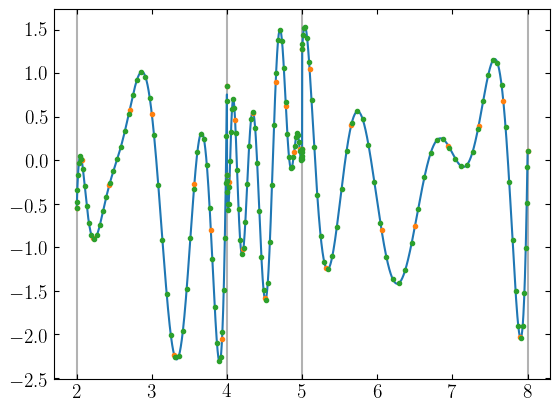

In [6]:
for p in mesh.partition:
    plt.axvline(p, color='k', alpha=0.3)
plt.plot(x, u(x))
plt.plot(X, u.func, '.')
plt.plot(X2, u2.func, '.')
plt.show()

In [9]:
u2 = u.match_domains()
diff(u2.func, u2(X))

2.8287049456025693e-15

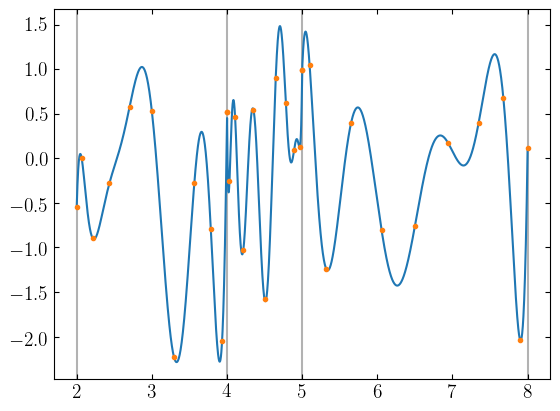

In [10]:
for p in mesh.partition:
    plt.axvline(p, color='k', alpha=0.3)
plt.plot(x, u(x))
plt.plot(X, u2.func, '.')
plt.show()

## Differentiate

In [11]:
x = np.linspace(*mesh.endpoints, 10000)
du = u.diff()
diff_num = np.gradient(u(x), x, edge_order=2)

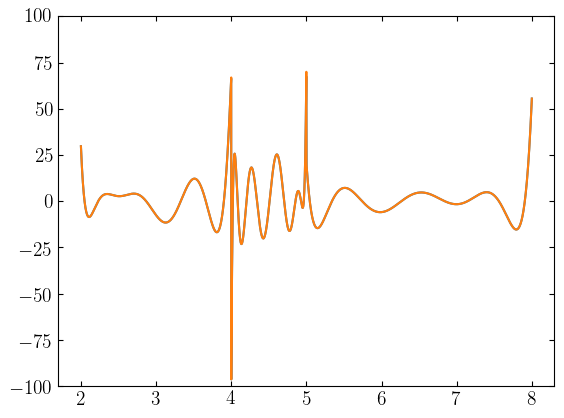

In [12]:
plt.plot(x, diff_num)
plt.plot(x, du(x))
plt.ylim(-100, 100)
plt.show()

## Integrate

In [13]:
x = np.linspace(*mesh.endpoints, 1000000)
int_num = np.trapz(u(x), x)
diff(u.int(), int_num)

3.1048224733435846e-10